<a href="https://colab.research.google.com/github/yusufghifari29/Pemrograman_Python/blob/main/1101194225_Yusuf_Ghifari_Cahya_Kelana_TT4304.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def cos(frek,tipe,ht,hr,d):
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [62]:
fr=1800 
area1='urban'
area2='suburban'
area3='open'
tower=80 
user=1.5 
dmin=300 
dmax=1000 
N=200 
ptx=30
gtx=10
grx=2
d=np.random.randint(dmin,dmax,N)

In [63]:
PlUrban=cos(fr,area1,tower,user,d) 
PlSuburban=cos(fr,area2,tower,user,d)
PlOpen=cos(fr,area3,tower,user,d)

In [64]:
def terima(ptx,pl,gtx,grx):
  #ptx to pdb
  NtL = lambda x: 10*np.log10(x)
  pdb=NtL(ptx)
  
  #hitung prx db
  prdb=pdb-pl+gtx+gtx
  
  #prdb to prx
  LtN = lambda x: 10**(x/10)
  prx=LtN(prdb)

  return prx

In [65]:
  prx_urban=terima(ptx,PlUrban,gtx,grx)
  prx_suburban=terima(ptx,PlSuburban,gtx,grx)
  prx_open=terima(ptx,PlOpen,gtx,grx)

In [66]:
d_sort=d[np.argsort(d)]
Urban_sort=prx_urban[np.argsort(d)]
Suburban_sort=prx_suburban[np.argsort(d)]
Open_sort=prx_open[np.argsort(d)]

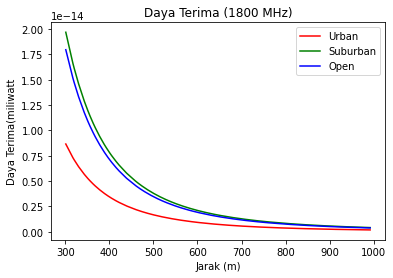

In [67]:
plt.figure()
plt.plot(d_sort,Urban_sort,'r-', label='Urban')
plt.plot(d_sort,Suburban_sort,'g-', label='Suburban')
plt.plot(d_sort,Open_sort,'b-', label='Open')
plt.legend()
plt.title('Daya Terima (1800 MHz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima(miliwatt')
plt.show()

In [68]:
fr1=700 
fr2=900 
fr3=1800
area1='urban'
tower=80 
user=1.5 
dmin=300 
dmax=1000 
N=200 
ptx=30
gtx=10
grx=2

In [69]:
PlUrban=cos(fr1,area1,tower,user,d)
PlUrban2=cos(fr2,area1,tower,user,d)
PlUrban3=cos(fr3,area1,tower,user,d)

In [70]:
prx_urban=terima(ptx,PlUrban,gtx,grx)
prx_urban2=terima(ptx,PlUrban2,gtx,grx)
prx_urban3=terima(ptx,PlUrban3,gtx,grx)

In [71]:
d_sort=d[np.argsort(d)]
Urban_sort=prx_urban[np.argsort(d)]
Urban2_sort=prx_urban2[np.argsort(d)]
Urban3_sort=prx_urban3[np.argsort(d)]

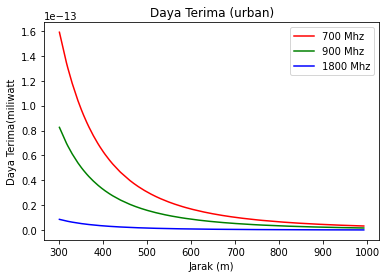

In [72]:
plt.figure()
plt.plot(d_sort,Urban_sort,'r-', label='700 Mhz')
plt.plot(d_sort,Urban2_sort,'g-', label='900 Mhz')
plt.plot(d_sort,Urban3_sort,'b-', label='1800 Mhz')
plt.legend()
plt.title('Daya Terima (urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima(miliwatt')
plt.show()

In [73]:
def noice(prx,bw):
  SNdb=-174+10*np.log10(bw)
  #SNdb to SnR(numerik)
  LtN = lambda x: 10**(x/10)
  SnR=LtN(SNdb)
  SNR=prx/SnR
  
  return SNR

In [74]:
bw=5000000

In [75]:
  snr_urban=noice(prx_urban,bw)
  snr_suburban=noice(prx_suburban,bw)
  snr_open=noice(prx_open,bw)

In [76]:
d_sort=d[np.argsort(d)]
urban_sort=snr_urban[np.argsort(d)]
suburban_sort=snr_suburban[np.argsort(d)]
open_sort=snr_open[np.argsort(d)]

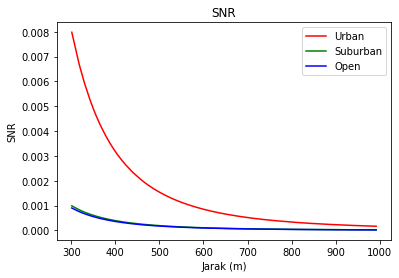

In [77]:
plt.figure()
plt.plot(d_sort,urban_sort,'r-', label='Urban')
plt.plot(d_sort,suburban_sort,'g-', label='Suburban')
plt.plot(d_sort,open_sort,'b-', label='Open')
plt.legend()
plt.title('SNR')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()

In [78]:
snr_urban=noice(prx_urban,bw)
snr_urban2=noice(prx_urban2,bw)
snr_urban3=noice(prx_urban3,bw)

In [79]:
d_sort=d[np.argsort(d)]
Urban_sort=snr_urban[np.argsort(d)]
Urban2_sort=snr_urban2[np.argsort(d)]
Urban3_sort=snr_urban3[np.argsort(d)]

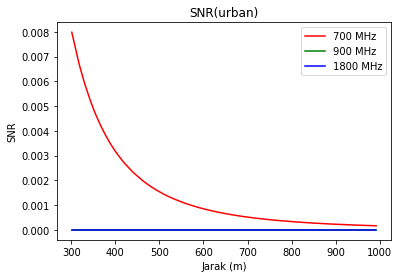

In [80]:
plt.figure()
plt.plot(d_sort,Urban_sort,'r-', label='700 MHz')
plt.plot(d_sort,Suburban_sort,'g-', label='900 MHz')
plt.plot(d_sort,Open_sort,'b-', label='1800 MHz')
plt.legend()
plt.title('SNR(urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR')
plt.show()

In [81]:
def kap(SNR,bw):
  KS=bw*np.log2(1+SNR)

  return KS

In [82]:
  kapasitas_urban=kap(snr_urban,bw)
  kapasitas_suburban=kap(snr_suburban,bw)
  kapasitas_open=kap(snr_open,bw)

In [83]:
d_sort=d[np.argsort(d)]
Urban_sort=kapasitas_urban[np.argsort(d)]
Suburban_sort=kapasitas_suburban[np.argsort(d)]
Open_sort=kapasitas_open[np.argsort(d)]

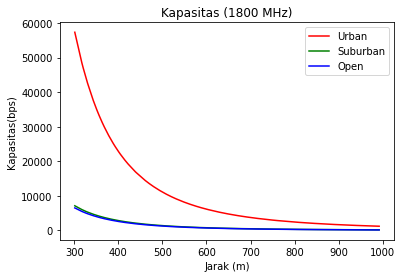

In [84]:
plt.figure()
plt.plot(d_sort,Urban_sort,'r-', label='Urban')
plt.plot(d_sort,Suburban_sort,'g-', label='Suburban')
plt.plot(d_sort,Open_sort,'b-', label='Open')
plt.legend()
plt.title('Kapasitas (1800 MHz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas(bps)')
plt.show()

In [85]:
  kapasitas_urban=kap(snr_urban,bw)
  kapasitas_urban2=kap(snr_urban2,bw)
  kapasitas_urban3=kap(snr_urban3,bw)

In [86]:
d_sort=d[np.argsort(d)]
Urban_sort=kapasitas_urban[np.argsort(d)]
Suburban_sort=kapasitas_urban2[np.argsort(d)]
Open_sort=kapasitas_urban3[np.argsort(d)]

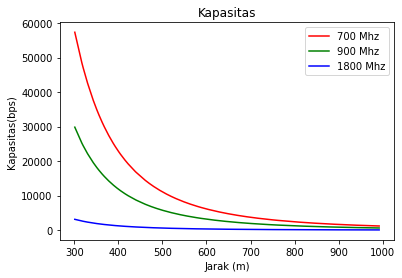

In [87]:
plt.figure()
plt.plot(d_sort,Urban_sort,'r-', label='700 Mhz')
plt.plot(d_sort,Suburban_sort,'g-', label='900 Mhz')
plt.plot(d_sort,Open_sort,'b-', label='1800 Mhz')
plt.legend()
plt.title('Kapasitas')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas(bps)')
plt.show()